# Step 11: Design Your Deployment Solution Architecture

The capstone project is primarily divided into 3 parts. 
<ul>
    <li>Collector – Collect stock historical price raw data from Finance API</li>
    <li>Analyzer – Transform data and analyze for Seasonality</li>
    <li>Flask Web App – Web app to display the outcome of analysis</li>
</ul>

### Deployment Solution Architecture

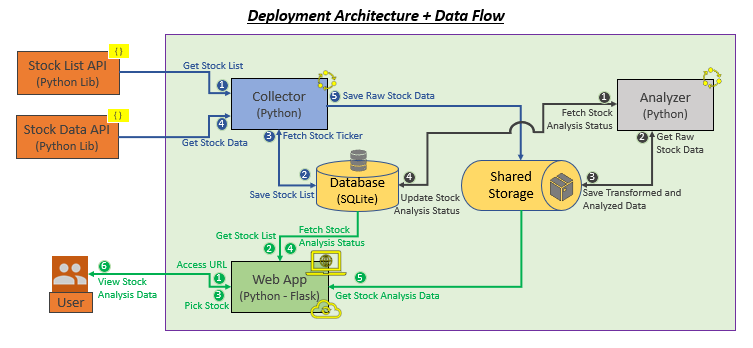

#### What are the inputs and outputs? 

<li>Input =  NSE Stock list form NSE API, Historical stock data from Finance API exposed by pandas-datareader library.</li>
<li>Output = Seasonality analysis of the selected stock data.</li>

#### Where and how will the data be stored? 

<li>Tracking will be done via a tracking table in SQLite database to synchronize the 3 modules.</li>
<li>CSV output and plots will be stored on shared drive accessible by all the 3 modules.</li>

#### How will data get from one component of the system to another? 

<li>Depicted in dataflow diagram above.</li>
<li>Status tracking data will be managed by Single source of truth in database. </li>

#### What is the lifecycle of your ML/DL model? 

<li>Separate models will be generated for each stock on a yearly basis. Since about 11 models are generated per stock and for about 4 to 6 years – about 44 to 66 models will be generated per stock. However these models will not be re-used after one prediction since the data changes drastically every year due to stock split, mergers, bonus, dividends etc.</li>
<li>Life of the seasonality analysis is one year. This can be broken down further by minor tweaks if the analysis time-frame is to be reduced to a monthly or quarterly basis</li>

####	How frequently do you need to retrain your model? 

<li>As mentioned above, re-training is required on rolling yearly basis only for the last year. Earlier years data can be re-used if no stock split etc. is observed in dataset.</li>
<li>If the analysis time-frame is reduced to monthly or quarterly basis, re-training will be required for prediction in every such last rolling cycle to handle the latest trends. Again, this is subject to no price adjustments.</li>

####	How will the system be monitored? 

<li>Collector and Analyzer can be configured to run via a cron job. Monitoring is possible by searching for errors in last 100 lines of the execution log.</li>
<li>Web app needs to be up continuously. Should consider leveraging the cloud instance monitoring features provided by the hosting vendor e.g. AWS in this case.</li>

####	How will you debug it if there are problems? 

<li>Adequate logging is enabled in code for debugging.</li>
<li>Additionally need to use the logging features provided by hosting vendor for the Web App, if required to debug any hosting errors.</li>

####	How will your system respond to unexpected errors or outages? 

<li>Most of the possible error scenarios are handled via appropriate error handling based on severity of the error and re-try mechanism in Collector and Analyzer.</li>
<li>Web app code handles error scenarios to display a user friendly message</li>